Important note:

**BMI and Health Insurance:**

**Risk Indicator:** A higher BMI (overweight/obese) signals an increased risk for health issues like diabetes and heart disease, leading to higher medical claims.

**Premiums:** Individuals with a higher BMI may face increased premiums due to the higher health risks.

**Eligibility:** Extremely high BMI may result in exclusions or denial of certain insurance policies.

**Wellness Programs:** Some insurance plans offer wellness programs or incentives to help reduce BMI and promote healthier living.

The Experiment covers an end-to-end data analysis project on a US Health Insurance dataset.The experment uses Pandas library for data analysis and visualization libraries like Seaborn and Matplotlib.

For descriptive statistics, the Notebook calculates mean, standard deviation, count, and other metrics for numeric columns using .describe() method. For categorical data, it counts the occurrences of each category using .value_counts().

To analyze correlations between numeric variables, the experiment includes creation a correlation matrix and visualizes it using a heatmap. It also creates scatter plots to understand relationships between variables.

For categorical variables, the video compares average insurance charges across different categories like smoker status and region using group by operations.

Some important insights from this experiment include:

1. The average age of insured people is 39 with a standard deviation of 14, indicating moderate age diversity.
2. The average BMI is 30.7, which is considered obese.
3. Most insured customers are non-smokers (80%), while only 274 are smokers.
The distribution across regions is relatively even, with the southeast having a slightly higher count.
4. Smoking status is the most significant factor affecting insurance charges, with smokers incurring much higher costs.
5. There are variations in charges across regions, with the southeast being the most expensive.

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/insurance.csv')

# Display the first 5 rows of the DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.age.mean()

39.20702541106129

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.sex.value_counts()

,count
sex,
male,676
female,662


In [9]:
df = df.rename(columns={'sex': 'gender'})
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df.gender.value_counts(normalize=True) #in percentage

,proportion
gender,
male,0.505232
female,0.494768


In [11]:
categorical_counts = df.select_dtypes(include=['object']).apply(pd.Series.value_counts)
categorical_counts

,gender,smoker,region
female,662.0,NaN,NaN
male,676.0,NaN,NaN
no,NaN,1064.0,NaN
northeast,NaN,NaN,324.0
northwest,NaN,NaN,325.0
southeast,NaN,NaN,364.0
southwest,NaN,NaN,325.0
yes,NaN,274.0,NaN


<Figure size 1000x600 with 0 Axes>

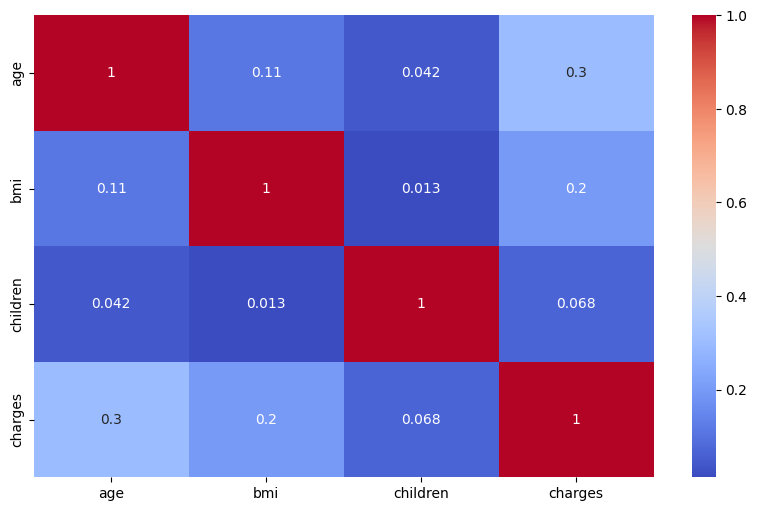

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.show()

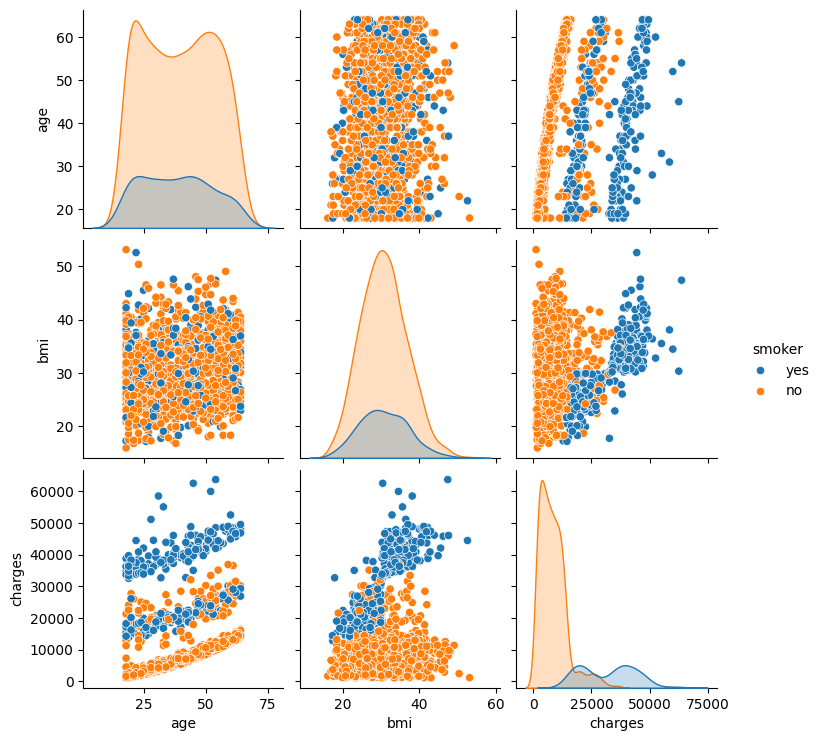

In [15]:
sns.pairplot(df, vars=['age', 'bmi', 'charges'], hue='smoker')
plt.show()

In [16]:
avg_charges_smokers = df.groupby('smoker')['charges'].mean()
print(avg_charges_smokers)

avg_charges_region = df.groupby('region')['charges'].mean()
print(avg_charges_region)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
